<img src='./assets/images/QTA8AWAN5D.png'>

# My import statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Import the data

In [2]:
df = pd.read_csv('retail_sales_data.csv')

## Step 2: Explore the dataset

In [3]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        100 non-null    object 
 1   Product_ID  100 non-null    int64  
 2   Quantity    100 non-null    int64  
 3   Revenue     100 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None
         Date  Product_ID  Quantity    Revenue
0  2022-04-13           4         9  85.092845
1  2022-12-15           4         7  93.563499
2  2022-09-28           4         1  78.534065
3  2022-04-17           3         1  66.898825
4  2022-03-13           3         9  58.068662


## Step 3: Clean the data
### Handling missing values

In [4]:
df.dropna(inplace=True)

## Handling outliers (assuming Revenue cannot be negative)

In [5]:
df = df[df['Revenue'] >= 0]

## Step 4: Calculate total revenue per month

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()

## Step 5: Create visualizations

c:\Users\amr.nabeel\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amr.nabeel\.conda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


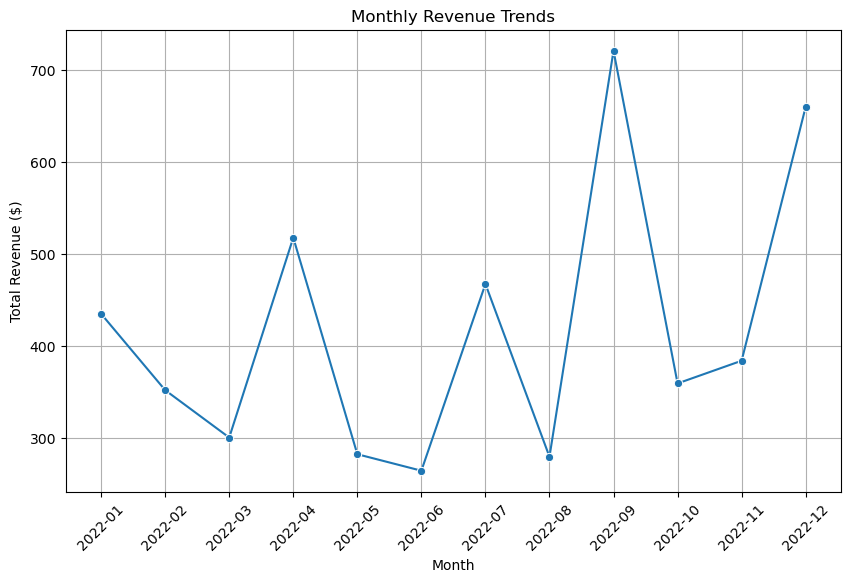

In [12]:
monthly_revenue_df = pd.DataFrame({'Month': monthly_revenue.index.astype(str), 'Revenue': monthly_revenue.values})

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue_df, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()